In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [184]:
dataOK = pd.read_csv("OK_earthquake_catalog.csv")

dataOK['origintime'] = pd.to_datetime(dataOK['origintime'])
dataOK = dataOK[dataOK['magnitude'] != 'None']
dataOK['month'] = pd.to_datetime(dataOK['origintime']).dt.to_period('M')
dataOK['year'] = pd.to_datetime(dataOK['origintime']).dt.to_period('Y')
dataOK = dataOK.reset_index()


<AxesSubplot:>

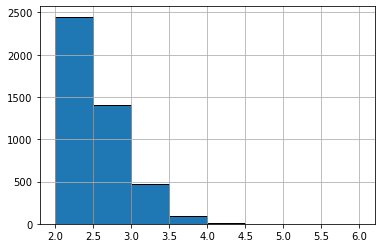

In [192]:
dataOK2014 = dataOK[dataOK["year"] == '2014']
dataOK2014["magnitude"].hist(bins=[2,2.5,3,3.5,4,4.5,5,5.5,6], edgecolor="black")

In [211]:
dataOK2014 = dataOK[dataOK["year"] == '2014']
count, division = np.histogram(dataOK2014["magnitude"], bins=[2,2.5,3,3.5,4,4.5,5,5.5,6])
print("2014 EQ By Magnitude")
for i in zip(division,count):
    print(i)

2014 EQ By Magnitude
(2.0, 2449)
(2.5, 1401)
(3.0, 472)
(3.5, 87)
(4.0, 13)
(4.5, 0)
(5.0, 0)
(5.5, 0)


In [212]:
dataOK2021 = dataOK[dataOK["year"] == '2021']
count, division = np.histogram(dataOK2021["magnitude"], bins=[2,2.5,3,3.5,4,4.5,5,5.5,6])
print("2021 EQ By Magnitude")
for i in zip(division,count):
    print(i)


2021 EQ By Magnitude
(2.0, 571)
(2.5, 105)
(3.0, 21)
(3.5, 14)
(4.0, 3)
(4.5, 0)
(5.0, 0)
(5.5, 0)


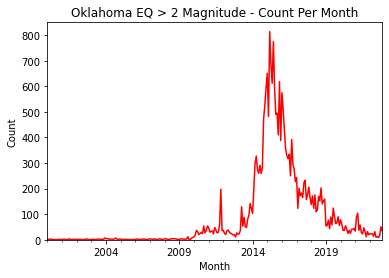

In [188]:
monthlyDataAll = dataOK['origintime'].groupby([dataOK['month']]).agg('count')

dataOK['magnitude'] = dataOK['magnitude'].astype(float)
bigsOK = dataOK[dataOK['magnitude']>2]
ax = bigsOK['origintime'].groupby([bigsOK['month']]).agg('count').plot(color='red',title="Oklahoma EQ > 2 Magnitude - Count Per Month")
ax.set_ylabel("Count")
ax.set_xlabel("Month")
ax.set_ylim(0,850)
fig = ax.get_figure()
fig.savefig('Images/OKmonthlyEQ.jpg',dpi=1200)


C:\Users\danco\AppData\Local\Temp/ipykernel_484/896109181.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigsOK3['M3.0+'] = bigsOK3['origintime']
C:\Users\danco\AppData\Local\Temp/ipykernel_484/896109181.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigsOK['M2.0+'] = bigsOK['origintime']


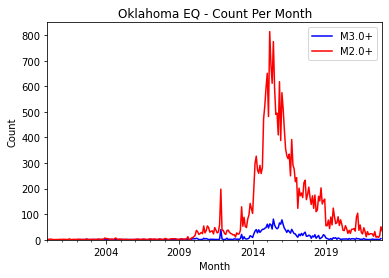

In [204]:
monthlyDataAll = dataOK['origintime'].groupby([dataOK['month']]).agg('count')

dataOK['magnitude'] = dataOK['magnitude'].astype(float)
bigsOK3 = dataOK[dataOK['magnitude']>3]
bigsOK3['M3.0+'] = bigsOK3['origintime']
ax = bigsOK3['M3.0+'].groupby([bigsOK3['month']]).agg('count').plot(color='blue')


bigsOK = dataOK[dataOK['magnitude']>2]
bigsOK['M2.0+'] = bigsOK['origintime']
ax = bigsOK['M2.0+'].groupby([bigsOK['month']]).agg('count').plot(color='red',title="Oklahoma EQ - Count Per Month")
ax.set_ylabel("Count")
ax.set_xlabel("Month")
ax.set_ylim(0,850)
ax.legend()
fig = ax.get_figure()
fig.savefig('Images/OKmonthlyEQ23.jpg',dpi=1200)



In [36]:
dataCA = pd.read_csv("CA_earthquake_catalog.csv")

dataCA['origintime'] = pd.to_datetime(dataCA['origintime'])
dataCA['month'] = pd.to_datetime(dataCA['origintime']).dt.to_period('M')
dataCA = dataCA.reset_index()
# dataOK.head(20)

C:\Users\danco\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [40]:
outline_CA = gpd.read_file("./Shapefiles/CA_State_TIGER2016.shp")
outline_CA =outline_CA.to_crs("EPSG:4326")

In [59]:
gdf_CA_quakes = gpd.GeoDataFrame(
    dataCA, geometry=gpd.points_from_xy(dataCA.longitude, dataCA.latitude))

In [62]:
gdf_CA_quakes.head()

,index,origintime,magnitude,magnitude_source,latitude,longitude,depth_km,month,geometry
0,0,2019-07-06 03:19:53.040000+00:00,7.1,USGS,35.769500,-117.599333,8.000,2019-07,POINT (-117.59933 35.76950)
1,1,2003-12-22 19:15:56.240000+00:00,6.5,USGS,35.700500,-121.100500,8.382,2003-12,POINT (-121.10050 35.70050)
2,2,2020-05-15 11:03:27.176000+00:00,6.5,USGS,38.168900,-117.849700,2.700,2020-05,POINT (-117.84970 38.16890)
3,3,2019-07-04 17:33:49+00:00,6.4,USGS,35.705333,-117.503833,10.500,2019-07,POINT (-117.50383 35.70533)
4,4,2021-12-20 20:10:31.310000+00:00,6.2,USGS,40.390167,-124.298000,27.040,2021-12,POINT (-124.29800 40.39017)


In [64]:
gdf_CA_quakes = gdf_CA_quakes.set_crs("EPSG:4326")
gdf_CA_quakes = gdf_CA_quakes.to_crs("EPSG:4326")

<AxesSubplot:>

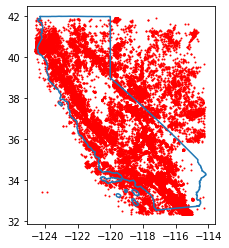

In [71]:
base = outline_CA.boundary.plot()
gdf_CA_quakes.plot(ax=base, marker='o', color='red', markersize=1)
# base = outline_CA.plot()

In [87]:
CA_quakes_mask = gdf_CA_quakes.within(outline_CA.loc[0,'geometry'])
gdf_CA_quakes_filter = gdf_CA_quakes.loc[CA_quakes_mask]
gdf_CA_quakes_filter.plot()

C:\Users\danco\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


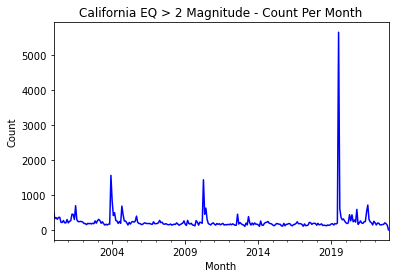

In [123]:

monthlyDataAllCA_filtered = gdf_CA_quakes_filter['origintime'].groupby([gdf_CA_quakes_filter['month']]).agg('count')
# monthlyDataAll.plot()
gdf_CA_quakes_filter['magnitude'] = gdf_CA_quakes_filter['magnitude'].astype(float)
gdf_CA_quakes_big = gdf_CA_quakes_filter[gdf_CA_quakes_filter['magnitude']>2]
ax = gdf_CA_quakes_big['origintime'].groupby([gdf_CA_quakes_big['month']]).agg('count').plot(color='blue',title="California EQ > 2 Magnitude - Count Per Month")
ax.set_ylabel("Count")
ax.set_xlabel("Month")
fig = ax.get_figure()
fig.savefig('Images/CAmonthlyEQ.jpg',dpi=1200)

# bigsOK['origintime'].groupby([bigsOK['month']]).agg('count').plot()

C:\Users\danco\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\danco\AppData\Local\Temp/ipykernel_484/98976854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigsOK['Oklahoma-Normalized'] = bigsOK['origintime']


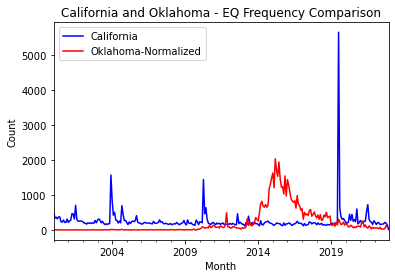

In [153]:
gdf_CA_quakes_big['California'] = gdf_CA_quakes_big['origintime']
ax = gdf_CA_quakes_big['California'].groupby([gdf_CA_quakes_big['month']]).agg('count').plot(color='blue')

bigsOK['Oklahoma-Normalized'] = bigsOK['origintime']
ok_monthly_count = bigsOK['Oklahoma-Normalized'].groupby([bigsOK['month']]).agg('count')
ok_monthly_count_norm = bigsOK['Oklahoma-Normalized'].groupby([bigsOK['month']]).agg('count')*2.5
ok_monthly_count_norm.plot(color='red',title="California and Oklahoma - EQ Frequency Comparison")
ax.set_ylabel("Count")
ax.set_xlabel("Month")
ax.legend()
fig = ax.get_figure()
fig.savefig('Images/CA-OK_Comparison_norm.jpg',dpi=1200)

# bigsOK['origintime'].groupby([bigsOK['month']]).agg('count').plot()

In [120]:
ca_monthly_count = gdf_CA_quakes_big['California'].groupby([gdf_CA_quakes_big['month']]).agg('count')
print(ca_monthly_count.mean())
print(ca_monthly_count.std())

256.67391304347825
359.0361878553795


In [143]:
ok_monthly_count = bigsOK['Oklahoma'].groupby([bigsOK['month']]).agg('count')
print(ok_monthly_count.mean())
print(ok_monthly_count.std())

99.96218487394958
159.92871117097633


In [148]:
ok_monthly_count_norm = bigsOK['Oklahoma'].groupby([bigsOK['month']]).agg('count')*2.5


In [149]:
ok_monthly_count_norm.head(5)

month
2000-01    2.5
2000-04    7.5
2000-05    2.5
2000-06    2.5
2000-10    2.5
Freq: M, Name: Oklahoma, dtype: float64

In [130]:
df = pd.merge(ca_monthly_count, ok_monthly_count, right_index = True,
               left_index = True)

In [134]:
df=pd.DataFrame(ca_monthly_count).join(ok_monthly_count)
df = df.fillna(0)

In [137]:
before2010 = df.head(120)

In [141]:
print(before2010['California'].mean())
print(before2010['Oklahoma'].mean())

256.67391304347825
86.19927536231884


In [164]:
data1 = pd.DataFrame(ok_monthly_count)

In [170]:
data1.sort_values(by=['Oklahoma-Normalized'])

,Oklahoma-Normalized
month,
2000-01,1
2002-11,1
2002-12,1
2003-04,1
2007-07,1
...,...
2015-11,618
2015-01,651
2015-04,685


In [171]:
data1.tail()

,Oklahoma-Normalized
month,
2022-07,13
2022-08,9
2022-09,16
2022-10,51
2022-11,35
